# 2

1)Diria que no es una muestra balanceada ya que para la calse 1 hay 1481 datos y para la clase 2 hay 775 datos , casi el doble de datos clase 1 

2) El accuracy score viene dado por la suma de las clases correctamente predichas por el modelo 1231+629 dividio por el total de datos del modelo.


es decir accuracy score =(1231+629)/(1231+629+146+250)= 0,8244



3)



Para la calse 1 
precision= 1231/(1231+146)=0,8939


para clase 2 precision  = 629/(629+146)=0,8116



calse 1 recall= 1231/(1231+250)=0,8311


calse 2 recall = 629/(629+250)=0,71

Como se observa la clase dos tiene menor recall y precision , esto lo encontramos esperable ya que la muestra esta desbalanceada y hay cerca del doble de datos de tipo clase 1. Aun asi se podrian mejorar estas metricas mejorando el poder predictivo del modelo es decir el calsidficador, con esto se genera que la cantidad de falsos positivos y falsos negativos disminuya aumentando las metricas de accuracy, recall y precesion.

# 3

In [9]:
import pandas as pd
data = pd.read_excel('creditos_bancarios.xlsx',sheet_name="SouthGermanCredit")

OSError: [Errno 22] Invalid argument: 'creditos_bancarios.xlsx'

In [4]:
import pandas as pd 
data=pd.read_excel("creditos_bancarios.xlsx",sheet_name="SouthGermanCredit")

data

OSError: [Errno 22] Invalid argument: 'creditos_bancarios.xlsx'

hacemos el pre procesamiento de la data

In [2]:
X=data.drop("credit_risk",axis=1).values
y=data.credit_risk.values

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

estandarizamos

In [4]:
 from sklearn import preprocessing
 X_stand_train=X_train.copy()
 scaler = preprocessing.StandardScaler().fit(X_stand_train) 
 X_stand_train=scaler.transform(X_stand_train) # matriz atributos de entrenamiento
 X_stand_test=scaler.transform(X_test) # matriz atributos testeo estandarizada con la info de entrenamiento

ahora balanceamos solo la data de X_stand_train

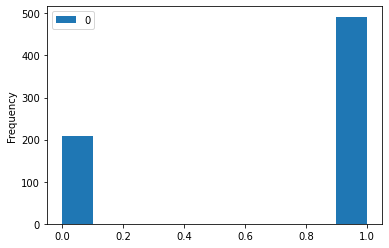

In [5]:
pd.DataFrame(y_train).plot(kind="hist")

hacemos el over sampling con el paquete de imblearn

In [6]:
from imblearn.over_sampling import RandomOverSampler 
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X_stand_train, y_train)


chequemos que el over sampling quedo bien hecho 

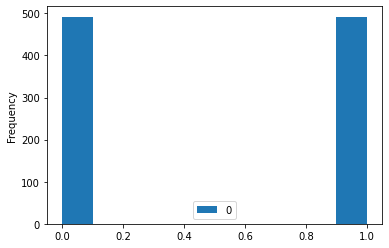

In [7]:
pd.DataFrame(y_over).plot(kind="hist")

estimamos los modelos 

modelo supor vector machine con kernel radial basis function

In [8]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
model=SVC(kernel="rbf")
model.fit(X_over,y_over)

SVC()

In [9]:
y_pred_train=model.predict(X_over)

calsification report muestra entrenamineto

In [10]:
print(classification_report(y_over,y_pred_train))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       492
           1       0.90      0.86      0.88       492

    accuracy                           0.88       984
   macro avg       0.88      0.88      0.88       984
weighted avg       0.88      0.88      0.88       984



calsification report muestra testeo

In [11]:
y_pred_test=model.predict(X_stand_test)
score_test_svc=classification_report(y_test,y_pred_test)
print(score_test_svc)

              precision    recall  f1-score   support

           0       0.58      0.65      0.62        92
           1       0.84      0.79      0.81       208

    accuracy                           0.75       300
   macro avg       0.71      0.72      0.72       300
weighted avg       0.76      0.75      0.75       300



modelo arbol de desicion 

muestra training

In [12]:
from sklearn import tree

model_tree=tree.DecisionTreeClassifier().fit( X_over, y_over)
y_pred_train=model_tree.predict(X_over)

print(classification_report(y_over,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       492
           1       1.00      1.00      1.00       492

    accuracy                           1.00       984
   macro avg       1.00      1.00      1.00       984
weighted avg       1.00      1.00      1.00       984



muestra testeo

In [13]:
model_tree=tree.DecisionTreeClassifier().fit( X_over, y_over)
y_pred = model_tree.predict(X_stand_test)
score_test_tree=classification_report(y_test,y_pred)
print(score_test_tree)

              precision    recall  f1-score   support

           0       0.54      0.49      0.51        92
           1       0.78      0.81      0.80       208

    accuracy                           0.71       300
   macro avg       0.66      0.65      0.65       300
weighted avg       0.71      0.71      0.71       300



red neuronal 

muestra training

In [14]:
from sklearn.neural_network import MLPClassifier
model_red = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2))
model_red.fit(X_over,y_over)
y_pred=model_red.predict(X_over)
print(classification_report(y_over,y_pred))


              precision    recall  f1-score   support

           0       0.81      0.97      0.88       492
           1       0.96      0.77      0.86       492

    accuracy                           0.87       984
   macro avg       0.89      0.87      0.87       984
weighted avg       0.89      0.87      0.87       984



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


muestra testeo

In [15]:
y_pred=model_red.predict(X_stand_test)
score_test_red=(classification_report(y_test,y_pred))
print(score_test_red)


              precision    recall  f1-score   support

           0       0.46      0.70      0.55        92
           1       0.82      0.63      0.72       208

    accuracy                           0.65       300
   macro avg       0.64      0.67      0.63       300
weighted avg       0.71      0.65      0.67       300



In [24]:
print("svc   ",score_test_svc,"arbol de desicion"  ,
      score_test_tree,"red neuronal  ",
      score_test_red)

svc                  precision    recall  f1-score   support

           0       0.58      0.65      0.62        92
           1       0.84      0.79      0.81       208

    accuracy                           0.75       300
   macro avg       0.71      0.72      0.72       300
weighted avg       0.76      0.75      0.75       300
 arbol de desicion               precision    recall  f1-score   support

           0       0.54      0.49      0.51        92
           1       0.78      0.81      0.80       208

    accuracy                           0.71       300
   macro avg       0.66      0.65      0.65       300
weighted avg       0.71      0.71      0.71       300
 red neuronal                 precision    recall  f1-score   support

           0       0.46      0.70      0.55        92
           1       0.82      0.63      0.72       208

    accuracy                           0.65       300
   macro avg       0.64      0.67      0.63       300
weighted avg       0.71      0.65 

de los tres algoritmos el que funciono mejor fue el suprt vector clasifier , y con el unico algoritmo que compite es la red neuronal, aunque en accuracy tiene un 10% mas de poder predictivo en recall que es la metrica de eficacia tiene un 5 % menos que la red neuronal pero en eficiencia tiene un 10 % mas que la red nueronal , esto es para la clase 0 que son aquellos malos pagadores. Por lo que si debiese implementar algunos de estos algoritmos elegirigia segun el sesgo que sea mas conveniente para el proyecto, el de precision o el de recall,